In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # data viz library
import math

In [3]:
data = pd.read_csv('../Dataset/Training/Features_Variant_1.csv')
data  # 54 features, 40948 data instances

,634995,0,463,1,0.0,806.0,11.291044776119403,1.0,70.49513846124168,0.0.1,...,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,1.2,0.19
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,1
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,2
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,1,0,0,72
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,28


In [4]:
# a) review feature names
data.columns  # we need to assign these columns to their descriptions provided in the paper

Index(['634995', '0', '463', '1', '0.0', '806.0', '11.291044776119403', '1.0',
       '70.49513846124168', '0.0.1', '806.0.1', '7.574626865671642', '0.0.2',
       '69.435826365571', '0.0.3', '76.0', '2.6044776119402986', '0.0.4',
       '8.50550186882253', '0.0.5', '806.0.2', '10.649253731343284', '1.0.1',
       '70.25478763764251', '-69.0', '806.0.3', '4.970149253731344', '0.0.6',
       '69.85058043098057', '0.1', '0.2', '0.3', '0.4', '0.5', '65', '166',
       '2', '0.6', '24', '0.7', '0.8', '0.9', '1.1', '0.10', '0.11', '0.12',
       '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '1.2', '0.19'],
      dtype='object')

In [5]:
# references:
# https://archive.ics.uci.edu/dataset/363/facebook+comment+volume+dataset
# https://github.com/louisgthier/facebook-comment-volume-prediction?tab=readme-ov-file - detailed column names
# https://github.com/AmishaMurarka/Facebook-Comment-Volume-Prediction/blob/main/Facebook%20Comment%20Volume%20Prediction.ipynb
columns = [
    'Page Popularity/likes', 'Page Checkins', 'Page talking about', 'Page Category',
    'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9', 'Derived_10',
    'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14', 'Derived_15', 'Derived_16',
    'Derived_17', 'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22',
    'Derived_23', 'Derived_24', 'Derived_25', 'Derived_26', 'Derived_27', 'Derived_28','Derived_29',
    'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time', 'Post length', 'Post Share Count',
    'Post Promotion Status', 'H_hrs', 'Post published weekday_1', 'Post published weekday_2',
    'Post published weekday_3', 'Post published weekday_4', 'Post published weekday_5',
    'Post published weekday_6', 'Post published weekday_7', 'Base DateTime weekday_1',
    'Base DateTime weekday_2', 'Base DateTime weekday_3', 'Base DateTime weekday_4',
    'Base DateTime weekday_5', 'Base DateTime weekday_6', 'Base DateTime weekday_7',
    'No_of_Comments_in_H_hours'
]
data.columns = columns
data.columns

Index(['Page Popularity/likes', 'Page Checkins', 'Page talking about',
       'Page Category', 'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8',
       'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13',
       'Derived_14', 'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18',
       'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23',
       'Derived_24', 'Derived_25', 'Derived_26', 'Derived_27', 'Derived_28',
       'Derived_29', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',
       'Post length', 'Post Share Count', 'Post Promotion Status', 'H_hrs',
       'Post published weekday_1', 'Post published weekday_2',
       'Post published weekday_3', 'Post published weekday_4',
       'Post published weekday_5', 'Post published weekday_6',
       'Post published weekday_7', 'Base DateTime weekday_1',
       'Base DateTime weekday_2', 'Base DateTime weekday_3',
       'Base DateTime weekday_4', 'Base DateTime weekday_5',
       'Base DateTime weekda

In [6]:
# b) summary statistics
display(data.describe())

,Page Popularity/likes,Page Checkins,Page talking about,Page Category,Derived_5,Derived_6,Derived_7,Derived_8,Derived_9,Derived_10,...,Post published weekday_6,Post published weekday_7,Base DateTime weekday_1,Base DateTime weekday_2,Base DateTime weekday_3,Base DateTime weekday_4,Base DateTime weekday_5,Base DateTime weekday_6,Base DateTime weekday_7,No_of_Comments_in_H_hours
count,4.094800e+04,40948.000000,4.094800e+04,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,...,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000
mean,1.313830e+06,4676.247949,4.480133e+04,24.255348,1.586280,443.324998,55.721469,35.646381,67.464077,0.219473,...,0.146161,0.136930,0.141643,0.132510,0.137638,0.148603,0.150850,0.143890,0.144867,7.323068
std,6.785834e+06,20593.423357,1.109349e+05,19.950496,20.753426,496.698029,86.934332,69.960877,81.569243,10.055268,...,0.353272,0.343777,0.348688,0.339048,0.344524,0.355701,0.357907,0.350982,0.351971,35.494965
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.141000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [7]:
# c) review data types
data.info()  # all numeric/binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page Popularity/likes      40948 non-null  int64  
 1   Page Checkins              40948 non-null  int64  
 2   Page talking about         40948 non-null  int64  
 3   Page Category              40948 non-null  int64  
 4   Derived_5                  40948 non-null  float64
 5   Derived_6                  40948 non-null  float64
 6   Derived_7                  40948 non-null  float64
 7   Derived_8                  40948 non-null  float64
 8   Derived_9                  40948 non-null  float64
 9   Derived_10                 40948 non-null  float64
 10  Derived_11                 40948 non-null  float64
 11  Derived_12                 40948 non-null  float64
 12  Derived_13                 40948 non-null  float64
 13  Derived_14                 40948 non-null  flo

In [8]:
# d) identify anomalies/null values/outliers
print("NULL VALUES CHECK:")
display(data.isnull().sum()) # no explicit null values - need to eval further

NULL VALUES CHECK:


Page Popularity/likes        0
Page Checkins                0
Page talking about           0
Page Category                0
Derived_5                    0
Derived_6                    0
Derived_7                    0
Derived_8                    0
Derived_9                    0
Derived_10                   0
Derived_11                   0
Derived_12                   0
Derived_13                   0
Derived_14                   0
Derived_15                   0
Derived_16                   0
Derived_17                   0
Derived_18                   0
Derived_19                   0
Derived_20                   0
Derived_21                   0
Derived_22                   0
Derived_23                   0
Derived_24                   0
Derived_25                   0
Derived_26                   0
Derived_27                   0
Derived_28                   0
Derived_29                   0
CC1                          0
CC2                          0
CC3                          0
CC4     

In [9]:
# The first occurrence of each duplicate is not marked as True by duplicated() so only subsequent occurrences are considered duplicates
print("DUPLICATES CHECK")
display(data[data.duplicated()])  # probably want to remove these

DUPLICATES CHECK


,Page Popularity/likes,Page Checkins,Page talking about,Page Category,Derived_5,Derived_6,Derived_7,Derived_8,Derived_9,Derived_10,...,Post published weekday_6,Post published weekday_7,Base DateTime weekday_1,Base DateTime weekday_2,Base DateTime weekday_3,Base DateTime weekday_4,Base DateTime weekday_5,Base DateTime weekday_6,Base DateTime weekday_7,No_of_Comments_in_H_hours
3081,5970921,53096,234501,9,4.0,1311.0,141.198830,50.0,239.394133,0.0,...,0,0,0,1,0,0,0,0,0,12
4893,4290409,11,131422,9,0.0,1184.0,140.889952,65.0,203.263664,0.0,...,0,0,1,0,0,0,0,0,0,1
4935,4290409,11,131422,9,0.0,1184.0,140.889952,65.0,203.263664,0.0,...,0,0,0,0,1,0,0,0,0,0
14009,25599,2023,1835,32,0.0,183.0,12.200000,0.0,36.062882,0.0,...,0,0,0,0,0,0,1,0,0,0
15807,1670,0,8,13,0.0,5.0,0.277778,0.0,0.803157,0.0,...,1,0,1,0,0,0,0,0,0,0
22030,4685,11267,391,32,0.0,5.0,0.538462,0.0,1.194993,0.0,...,1,0,0,0,0,0,0,1,0,0
26080,2736,491,277,54,0.0,18.0,1.757143,0.5,3.044600,0.0,...,0,0,0,0,0,0,0,1,0,0
36303,296,165,1,56,0.0,1.0,0.200000,0.0,0.400000,0.0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
print("UNIQUE VALS CHECK")
display(data.nunique())  # Post Promotion Status only has 1 unique val - need to check further

UNIQUE VALS CHECK


Page Popularity/likes         639
Page Checkins                 173
Page talking about            507
Page Category                  81
Derived_5                      65
Derived_6                     363
Derived_7                     577
Derived_8                     215
Derived_9                     594
Derived_10                     35
Derived_11                    302
Derived_12                    551
Derived_13                    115
Derived_14                    566
Derived_15                     12
Derived_16                    307
Derived_17                    541
Derived_18                     93
Derived_19                    560
Derived_20                     63
Derived_21                    363
Derived_22                    572
Derived_23                    206
Derived_24                    591
Derived_25                    282
Derived_26                    301
Derived_27                    544
Derived_28                    102
Derived_29                    585
CC1           

In [11]:
display(data['Post Promotion Status'])  # seems useless

0        0
1        0
2        0
3        0
4        0
        ..
40943    0
40944    0
40945    0
40946    0
40947    0
Name: Post Promotion Status, Length: 40948, dtype: int64

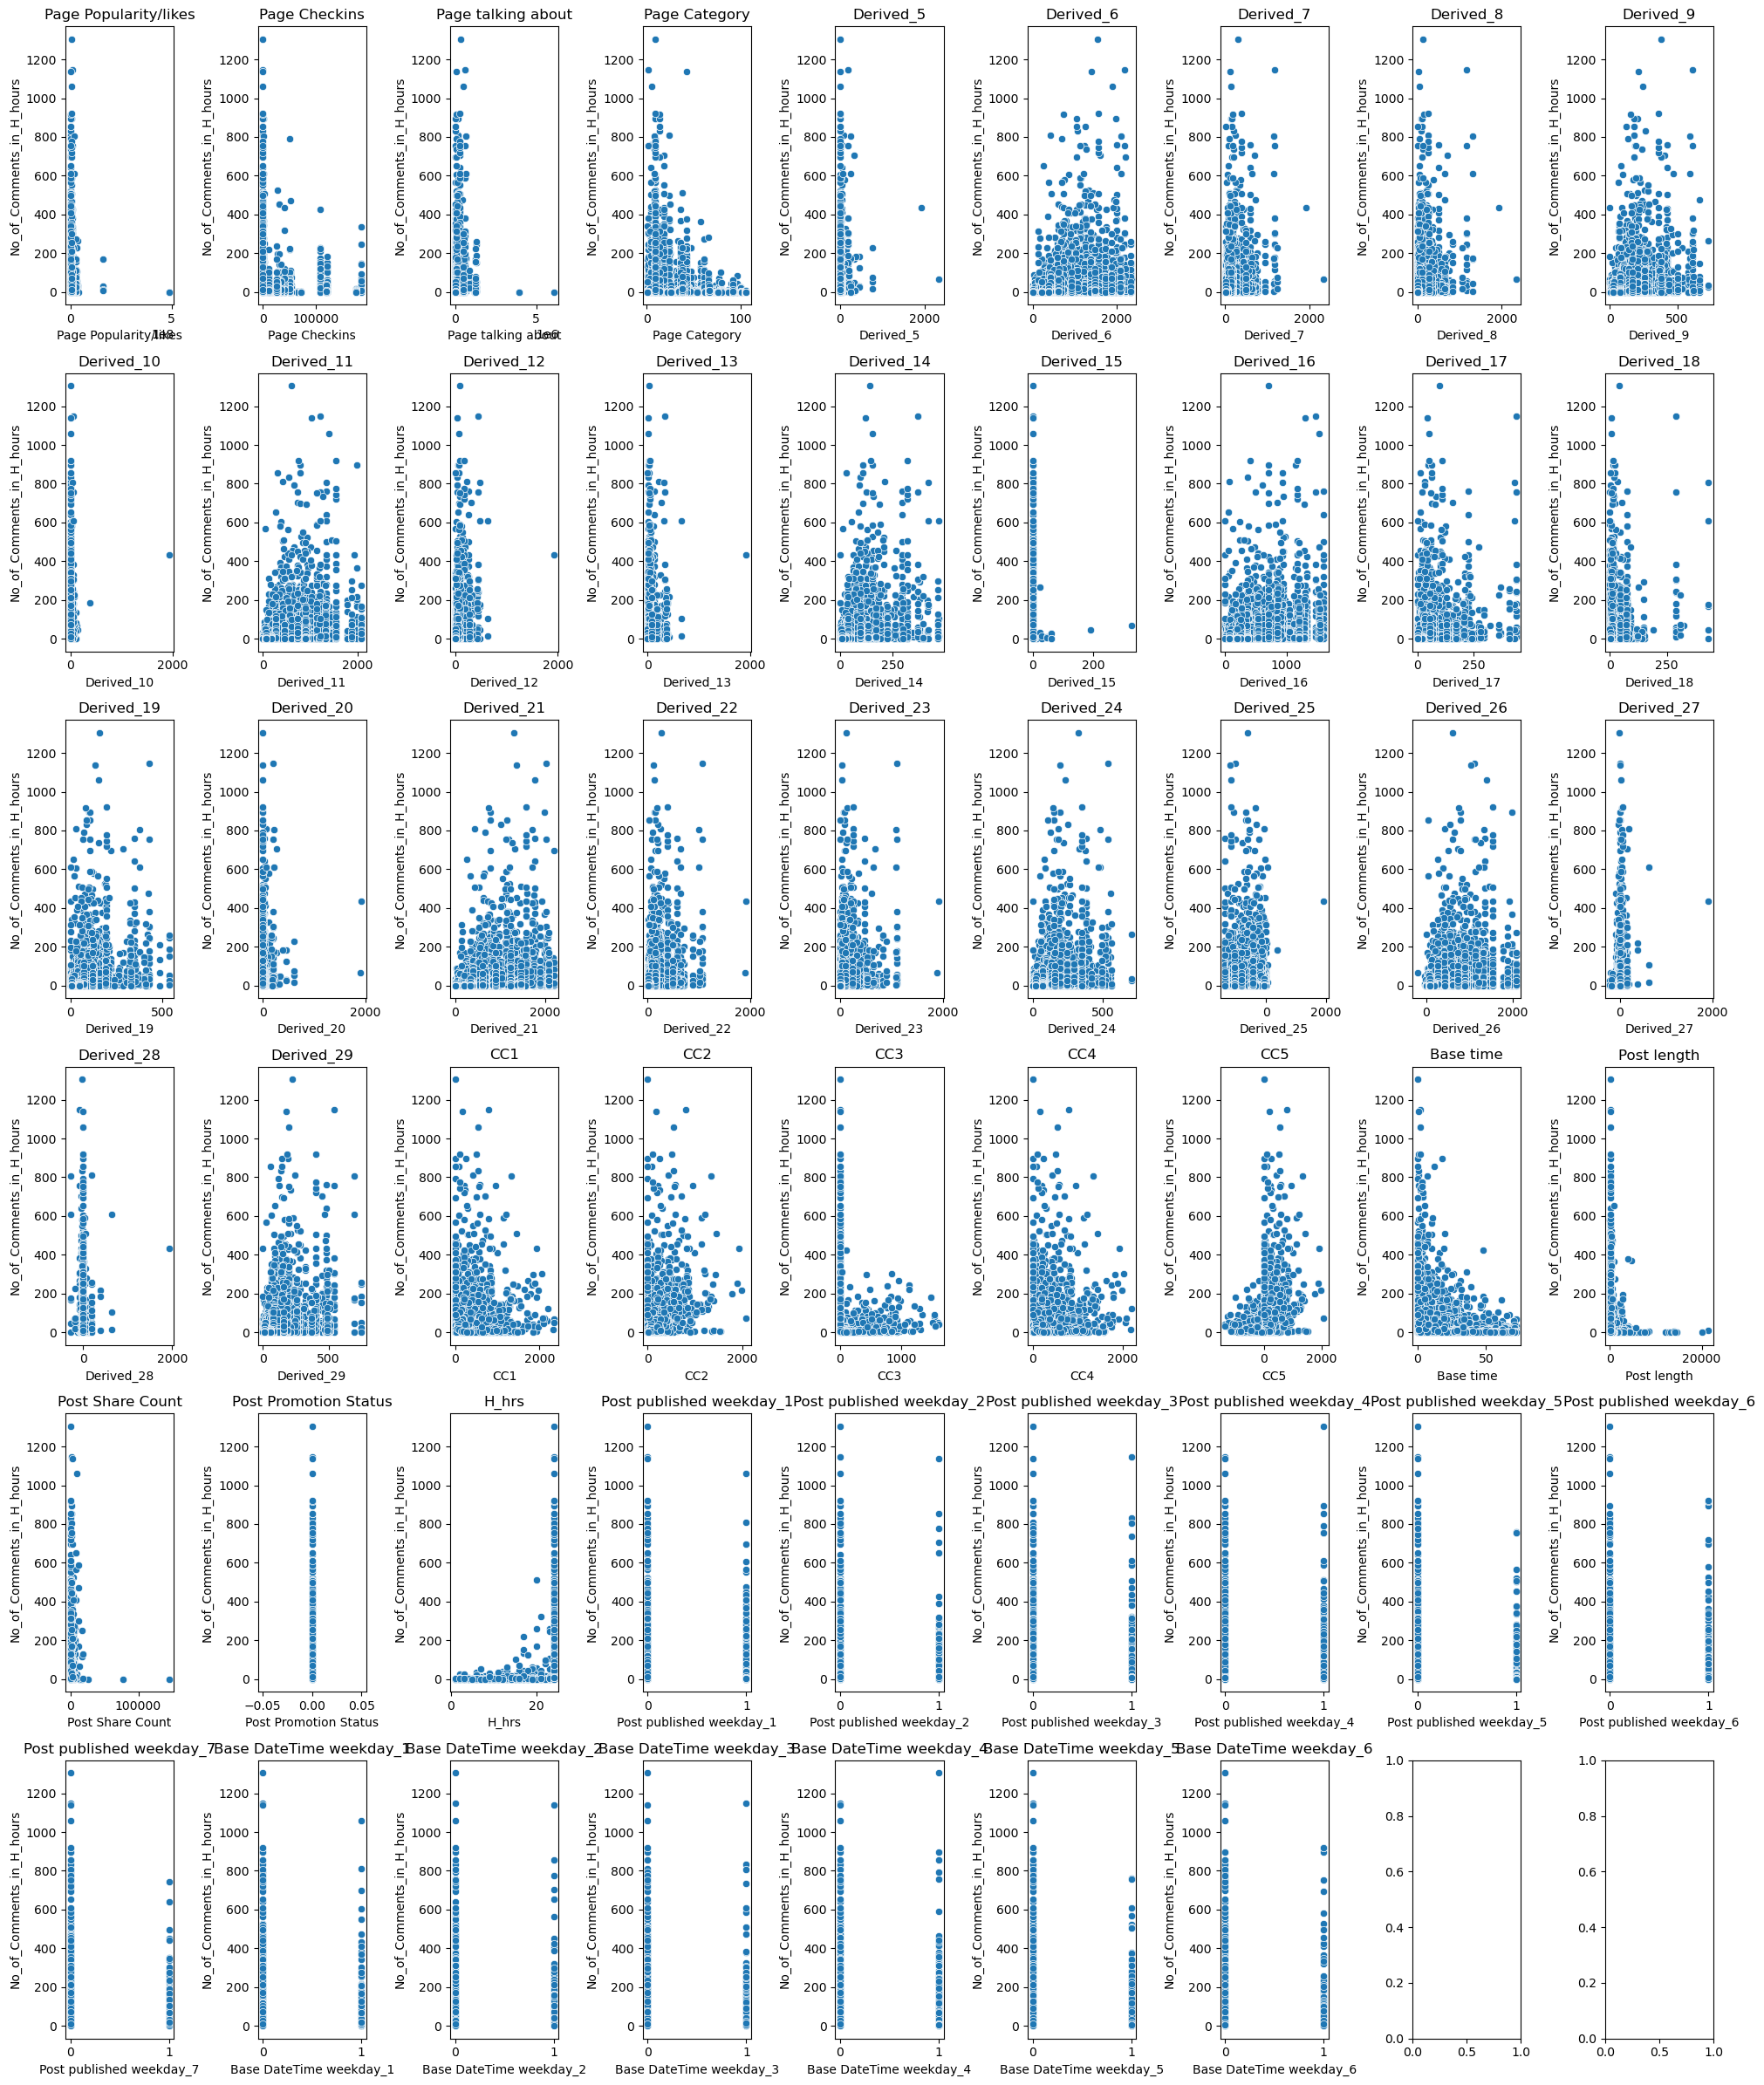

In [15]:
# e) visualizations
# check the distribution of each of the 53 features
n_cols = 9
n_rows = math.ceil(len(columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

columns = columns[:-1]
for i, col in enumerate(columns):
    sns.scatterplot(data=data, x=col, y='No_of_Comments_in_H_hours', ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()  # some features are very skewed

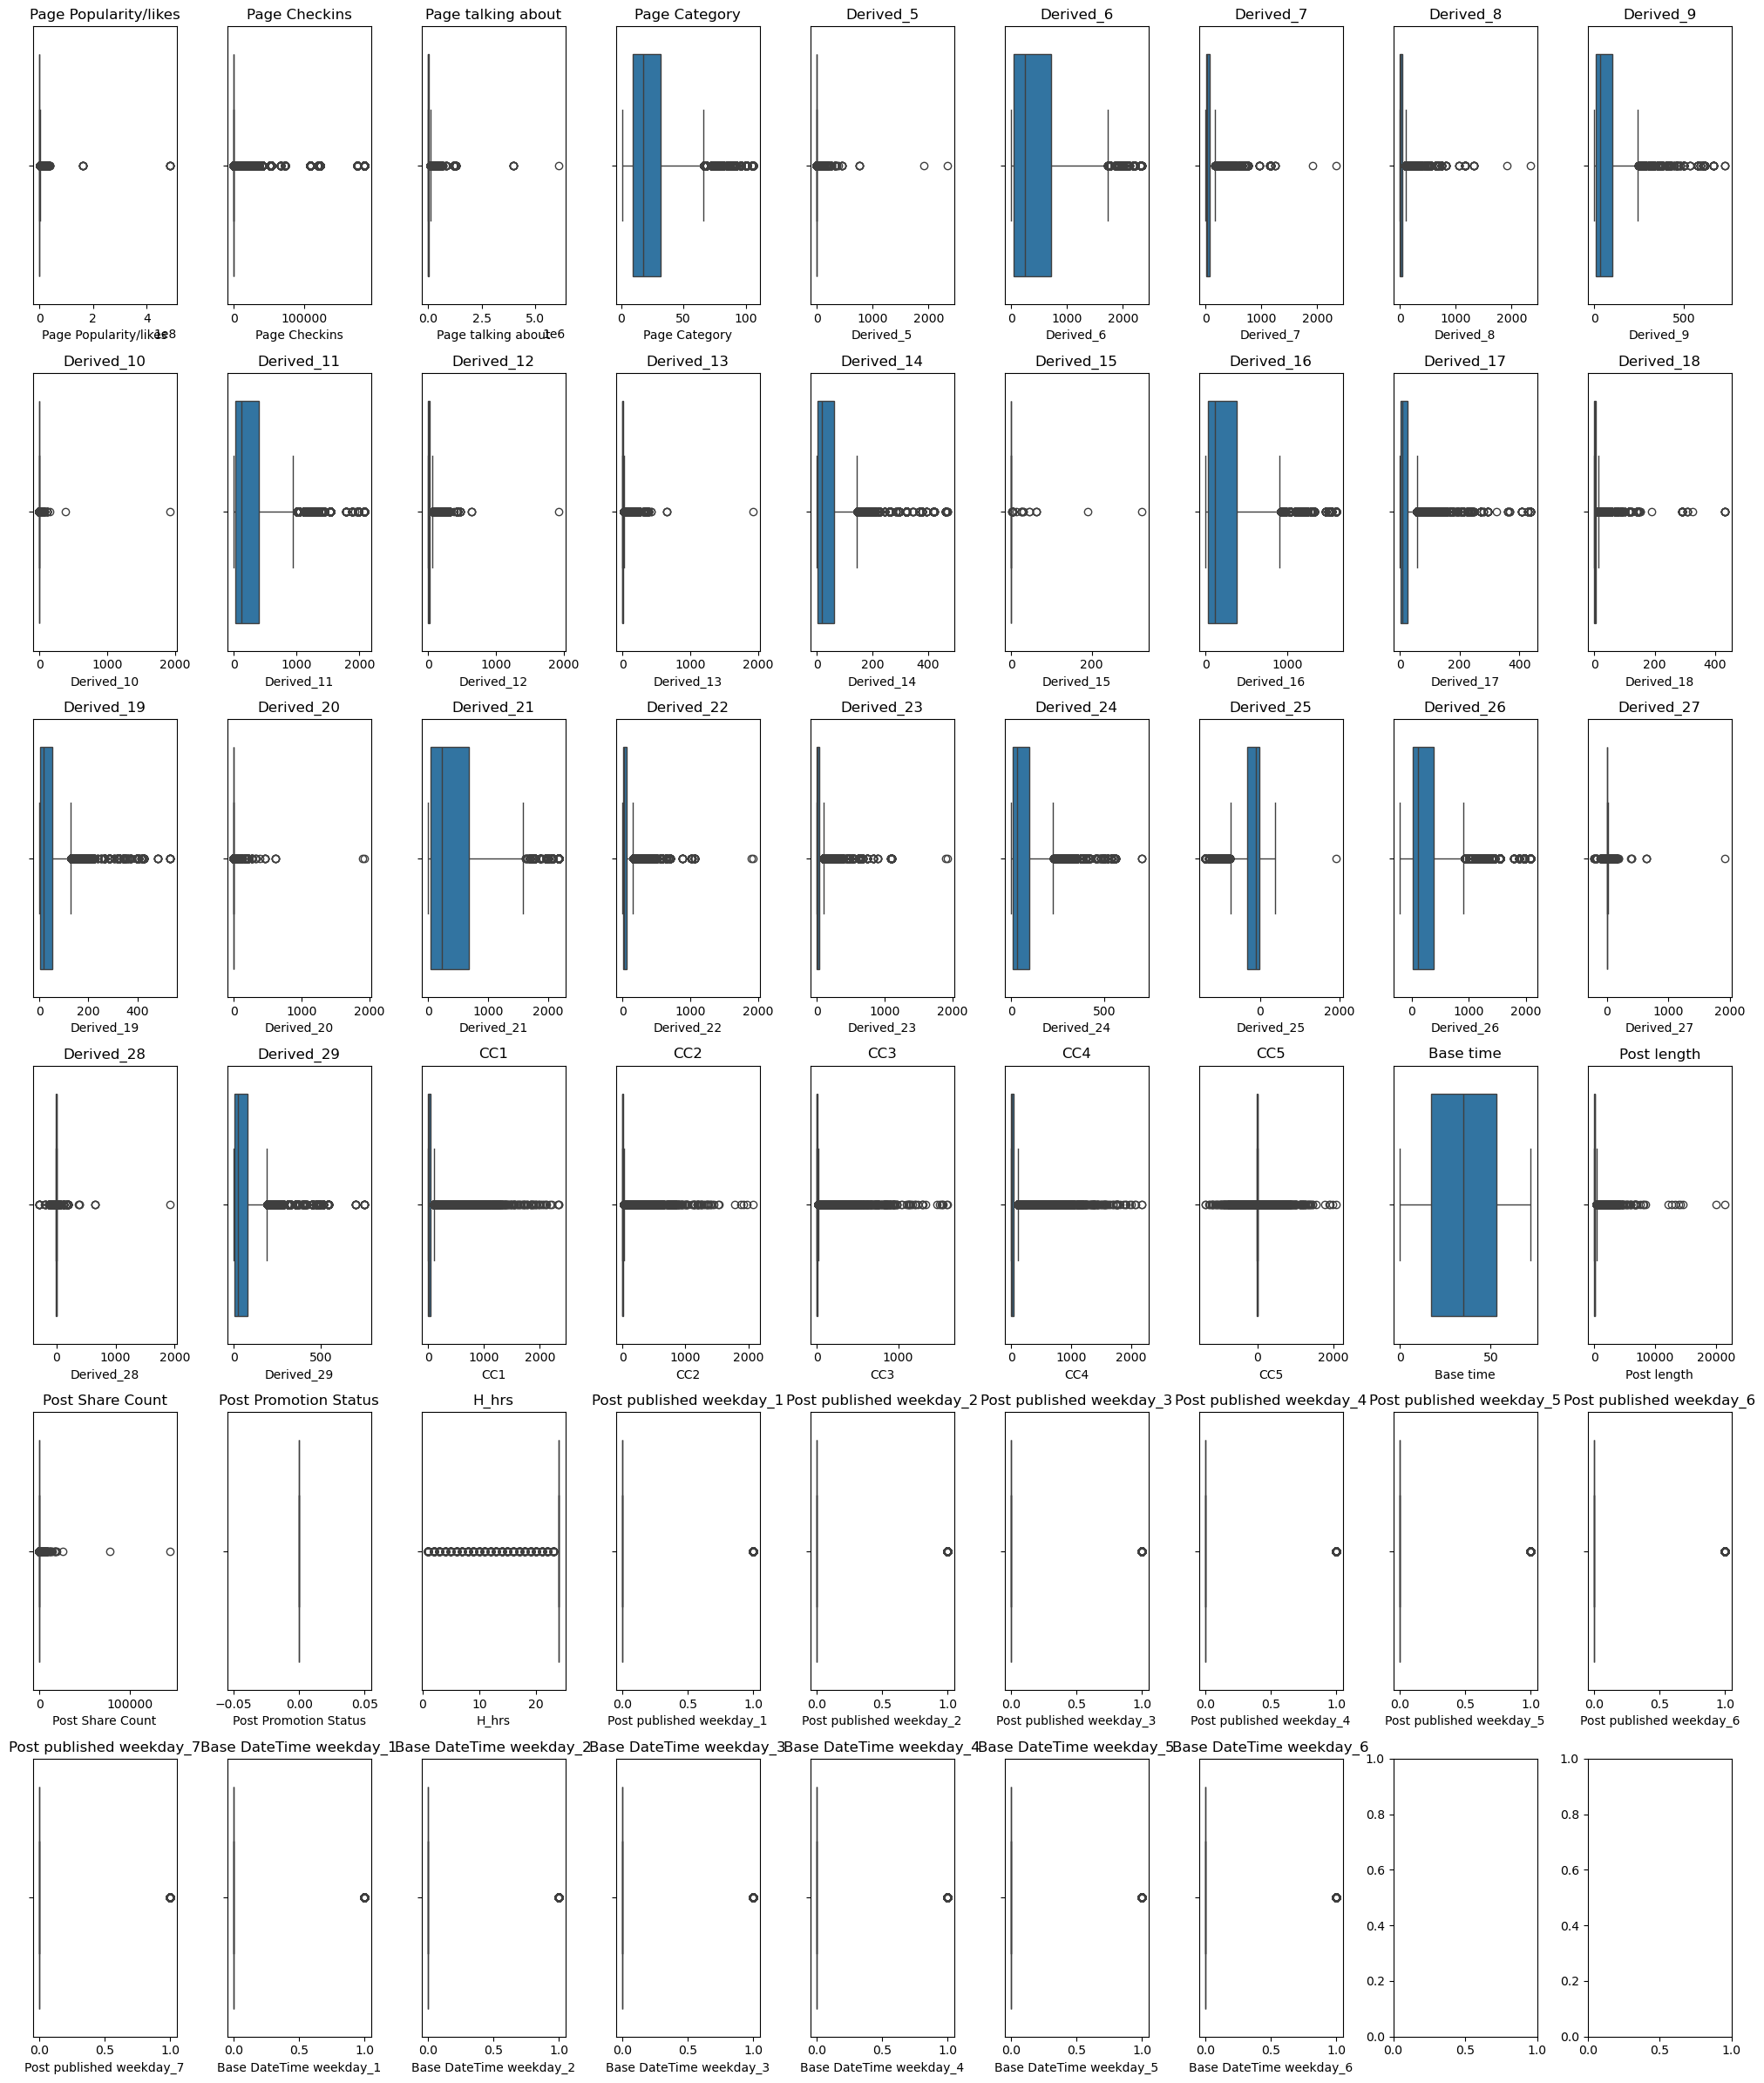

In [16]:
# check all 53 features for potential outliers with a boxplot
n_cols = 9
n_rows = math.ceil(len(columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

<Axes: >

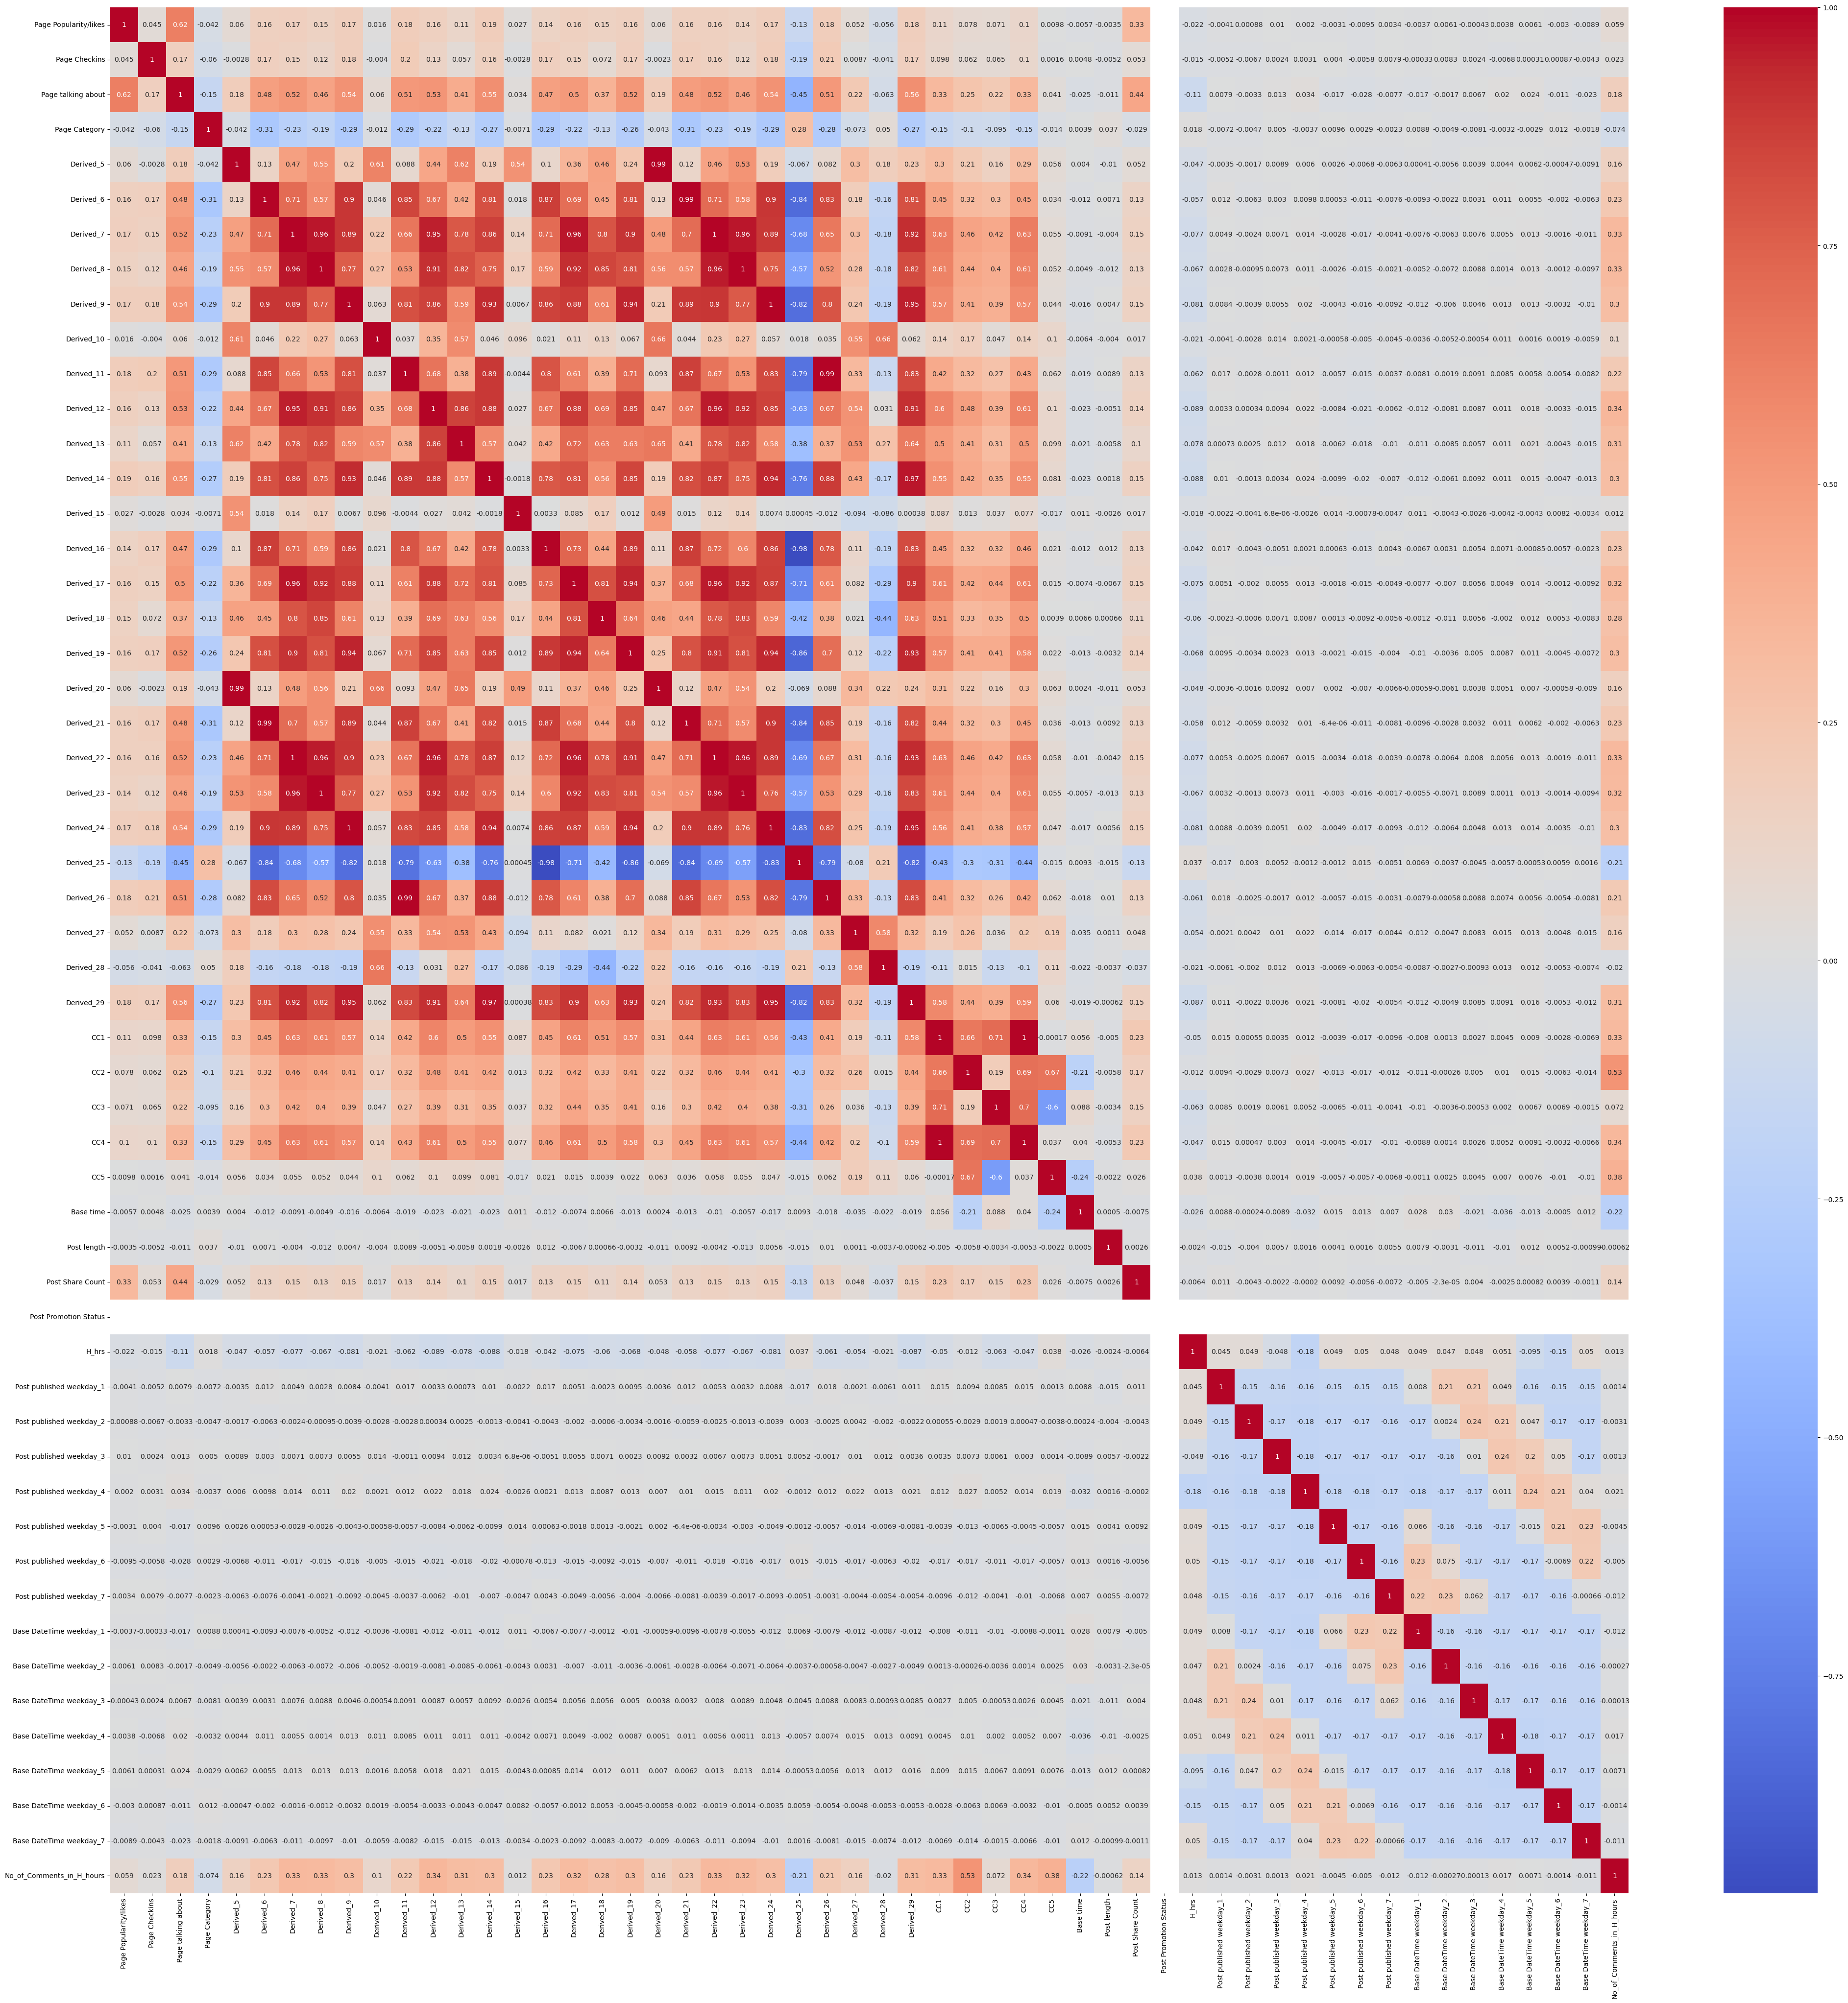

In [17]:
# lec 8 slide 45 - visualizing similarities between features with a correlation matrix
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)

In [18]:
# additional references
# # https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9105863
# - followup study to the original, combined all the variants and found that gradient boosting performed the best